# Random Forest Regressor
For Alnus only

## Libraries to perfom analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import datetime
import requests
%matplotlib inline

## Get pollen and weather data from csv

In [2]:
pol_wu_df = pd.read_csv('../analyze/pollen_weather.csv')

In [3]:
pol_wu_df.head()

,Date,Year,Month,DayOfYear,Ambrosia,Artemisia,Asteraceae,Alnus,Betula,Ericaceae,...,SeaLevelPressureMax,SeaLevelPressureAvg,SeaLevelPressureMin,VisibilityMax,VisibilityAvg,VisibilityMin,WindMax,WindAvg,Precip,Events
0,1996-07-01,1996,7,183,0.0,0.0,0.0,0.0,0.0,1.0,...,1011.0,1009.0,1008.0,10.0,9.0,4.0,35.0,19.0,0.0,Rain
1,1996-07-02,1996,7,184,0.0,0.0,1.0,0.0,0.0,1.0,...,1013.0,1011.0,1008.0,10.0,10.0,7.0,23.0,13.0,0.0,Rain
2,1996-07-03,1996,7,185,0.0,0.0,0.0,0.0,0.0,0.0,...,1014.0,1012.0,1010.0,10.0,10.0,5.0,32.0,11.0,0.0,Rain
3,1996-07-04,1996,7,186,0.0,0.0,1.0,0.0,0.0,0.0,...,1013.0,1010.0,1008.0,10.0,8.0,3.0,39.0,23.0,0.0,Rain
4,1996-07-05,1996,7,187,0.0,0.0,0.0,0.0,0.0,0.0,...,1013.0,1009.0,1005.0,10.0,9.0,5.0,24.0,13.0,0.0,Rain


In [ ]:
pol_wu_df.describe()

In [ ]:
pol_wu_df.info()

## Split train and test data

In [ ]:
list(pol_wu_df)

In [4]:
x_data = pol_wu_df.drop(['Date','Year','Ambrosia','Artemisia','Asteraceae','Alnus','Betula','Ericaceae','Carpinus',
'Castanea','Quercus','Chenopodium','Cupressaceae','Acer','Fraxinus','Gramineae','Fagus','Juncaceae','Aesculus',
'Larix','Corylus','Juglans','Umbellifereae','Ulmus','Urtica','Rumex','Populus','Pinaceae','Plantago','Platanus',
'Salix','Cyperaceae','Filipendula','Sambucus','Tilia','Events'],axis=1)

In [5]:
y_val = pol_wu_df['Alnus']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.3,random_state=42)
X_train

,Month,DayOfYear,TempMax,TempAvg,TempMin,DewPointMax,DewPointAvg,DewPointMin,HumidMax,HumidAvg,HumidMin,SeaLevelPressureMax,SeaLevelPressureAvg,SeaLevelPressureMin,VisibilityMax,VisibilityAvg,VisibilityMin,WindMax,WindAvg,Precip
6253,12,353,8.0,5.0,2.0,7.0,5.0,2.0,100.0,91.0,77.0,1014.0,1008.0,1005.0,26.0,11.0,3.0,26.0,18.0,1.02
2155,9,244,18.0,16.0,13.0,12.0,9.0,8.0,88.0,67.0,52.0,1029.0,1027.0,1025.0,10.0,10.0,10.0,23.0,16.0,0.00
2644,2,32,10.0,8.0,7.0,7.0,6.0,5.0,87.0,82.0,76.0,1022.0,1018.0,1012.0,10.0,10.0,4.0,39.0,31.0,0.00
7463,4,102,16.0,10.0,4.0,6.0,3.0,1.0,81.0,59.0,32.0,1026.0,1020.0,1015.0,31.0,15.0,10.0,34.0,14.0,0.00
2077,6,166,21.0,18.0,15.0,18.0,15.0,11.0,88.0,77.0,60.0,1019.0,1017.0,1014.0,10.0,9.0,3.0,19.0,10.0,0.00
3885,6,177,14.0,12.0,10.0,10.0,9.0,6.0,94.0,81.0,63.0,1009.0,1004.0,998.0,10.0,9.0,5.0,35.0,24.0,0.00
3424,3,81,7.0,3.0,0.0,-1.0,-3.0,-7.0,93.0,67.0,42.0,1009.0,1008.0,1007.0,8.0,4.0,2.0,24.0,16.0,0.00
3362,1,19,3.0,1.0,-1.0,3.0,2.0,-1.0,100.0,99.0,93.0,1024.0,1022.0,1019.0,4.0,1.0,0.0,11.0,5.0,0.00
3914,7,206,23.0,17.0,11.0,12.0,9.0,7.0,88.0,59.0,38.0,1018.0,1017.0,1015.0,10.0,10.0,10.0,19.0,10.0,0.00
584,2,36,3.0,-1.0,-4.0,-1.0,-4.0,-10.0,86.0,73.0,55.0,1022.0,1020.0,1017.0,10.0,6.0,3.0,6.0,2.0,0.00


## Train model

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [8]:
rfr = RandomForestRegressor(max_depth=50, random_state=0)

In [9]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

## Check feature importance

In [10]:
rfr.feature_importances_

array([0.00179202, 0.22982937, 0.08623824, 0.02807179, 0.04106332,
       0.0207872 , 0.02825827, 0.03809852, 0.01007346, 0.06031506,
       0.09690153, 0.03168382, 0.02306753, 0.032535  , 0.05632912,
       0.11595343, 0.02333604, 0.03320012, 0.04123659, 0.00122954])

Feature ranking:
1. feature 1 (0.229829)
2. feature 15 (0.115953)
3. feature 10 (0.096902)
4. feature 2 (0.086238)
5. feature 9 (0.060315)
6. feature 14 (0.056329)
7. feature 18 (0.041237)
8. feature 4 (0.041063)
9. feature 7 (0.038099)
10. feature 17 (0.033200)
11. feature 13 (0.032535)
12. feature 11 (0.031684)
13. feature 6 (0.028258)
14. feature 3 (0.028072)
15. feature 16 (0.023336)
16. feature 12 (0.023068)
17. feature 5 (0.020787)
18. feature 8 (0.010073)
19. feature 0 (0.001792)
20. feature 19 (0.001230)


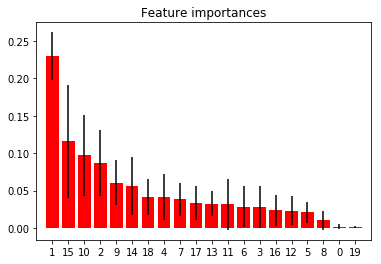

In [11]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()

## Run model on test data

In [12]:
predictions = rfr.predict( X_test)

## Check results / perf

Text(0,0.5,'Predicted Y')

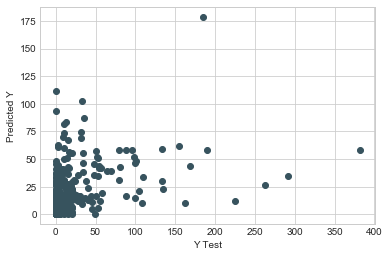

In [13]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [15]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.117863247863248
MSE: 238.75439316239317
RMSE: 15.451679299105104


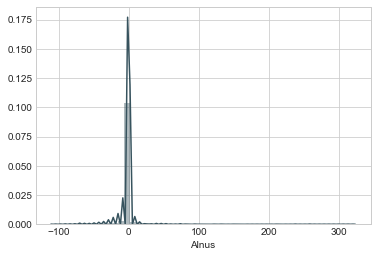

In [14]:
sns.distplot((y_test-predictions),bins=50);

## Save model for re-use

In [ ]:
filename = 'RFR_model.sav'
pickle.dump(rfr, open(filename, 'wb'))

In [ ]:
X_test.head()

In [16]:
# Get the weather forecast for today in CSV (SHOULD BE VIA API)
weather_today = pd.read_csv('weather_today.csv')
# Format it to the model input
day_of_year = (weather_today['Date']).apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%j"))
weather_today.insert(loc=1, column='DayOfYear', value=day_of_year)
month = (weather_today['Date']).apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%m"))
weather_today.insert(loc=1, column='Month', value=month)
weather_today.drop(columns=['Events','Date'], inplace=True)
# Load the model
loaded_model = pickle.load(open(filename, 'rb'))
# And predict
result = loaded_model.predict(weather_today)
# Then print the predict
print(result[0])

NameError: name 'filename' is not defined